In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/mnist_train_small.csv")
df

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
print("X_train.shape:", X_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train.shape: (60000, 28, 28)


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
             tf.keras.layers.Flatten(input_shape=(28, 28)),
             tf.keras.layers.Dense(128, activation='relu'),
             tf.keras.layers.Dropout(0.2),
             tf.keras.layers.Dense(10, activation='softmax')                           
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4835 - accuracy: 0.8578 - val_loss: 0.1349 - val_accuracy: 0.9587
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1503 - accuracy: 0.9564 - val_loss: 0.1106 - val_accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1134 - accuracy: 0.9651 - val_loss: 0.0879 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0883 - accuracy: 0.9726 - val_loss: 0.0765 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0718 - accuracy: 0.9775 - val_loss: 0.0736 - val_accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0621 - accuracy: 0.9796 - val_loss: 0.0700 - val_accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0557 - accuracy: 0.9821 - val_loss: 0.0716 - val_accuracy:

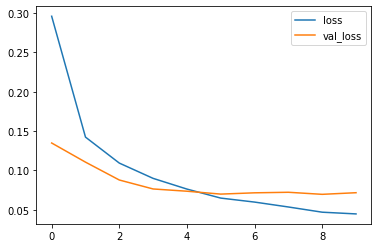

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

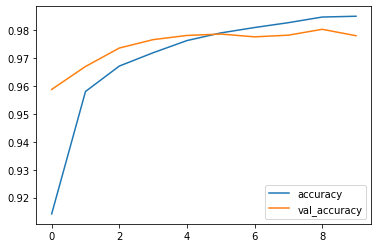

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0717 - accuracy: 0.9779
[0.07174377143383026, 0.9779000282287598]


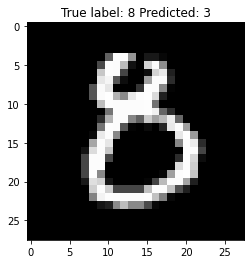

In [ ]:
# Show some misclassified examples
import numpy as np
p_test = model.predict(X_test).argmax(axis=1)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));